In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from society.visualisation.network import *

plt.rcParams["figure.figsize"] = (24, 10)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["font.size"] = 18

In [2]:
with open("analysis/society-ipd-epsilon-0.2.pickle", "rb") as f:
    data = pickle.load(f)

In [3]:
peak_df = pd.DataFrame(
    [
        ["train", population, lb, i + 1, p]
        for (population, lb, t), peaks in data["train_peaks"].items()
        for peak in peaks
        for i, p in enumerate(peak)
    ]
    + [
        ["test", population, lb, i + 1, p]
        for (population, lb, t), peaks in data["test_peaks"].items()
        for peak in peaks
        for i, p in enumerate(peak)
    ],
    columns=["phase", "population", "lookback", "peak_index", "weight"],
)

peak_df

,phase,population,lookback,peak_index,weight
0,train,16,1,1,0.389
1,train,16,1,2,0.691
2,train,16,1,1,0.427
3,train,16,1,2,0.755
4,train,16,1,1,0.334
...,...,...,...,...,...
3270,test,512,5,4,0.815
3271,test,512,5,1,1.000
3272,test,512,5,2,0.050
3273,test,512,5,3,0.648


(0.0, 1.0)

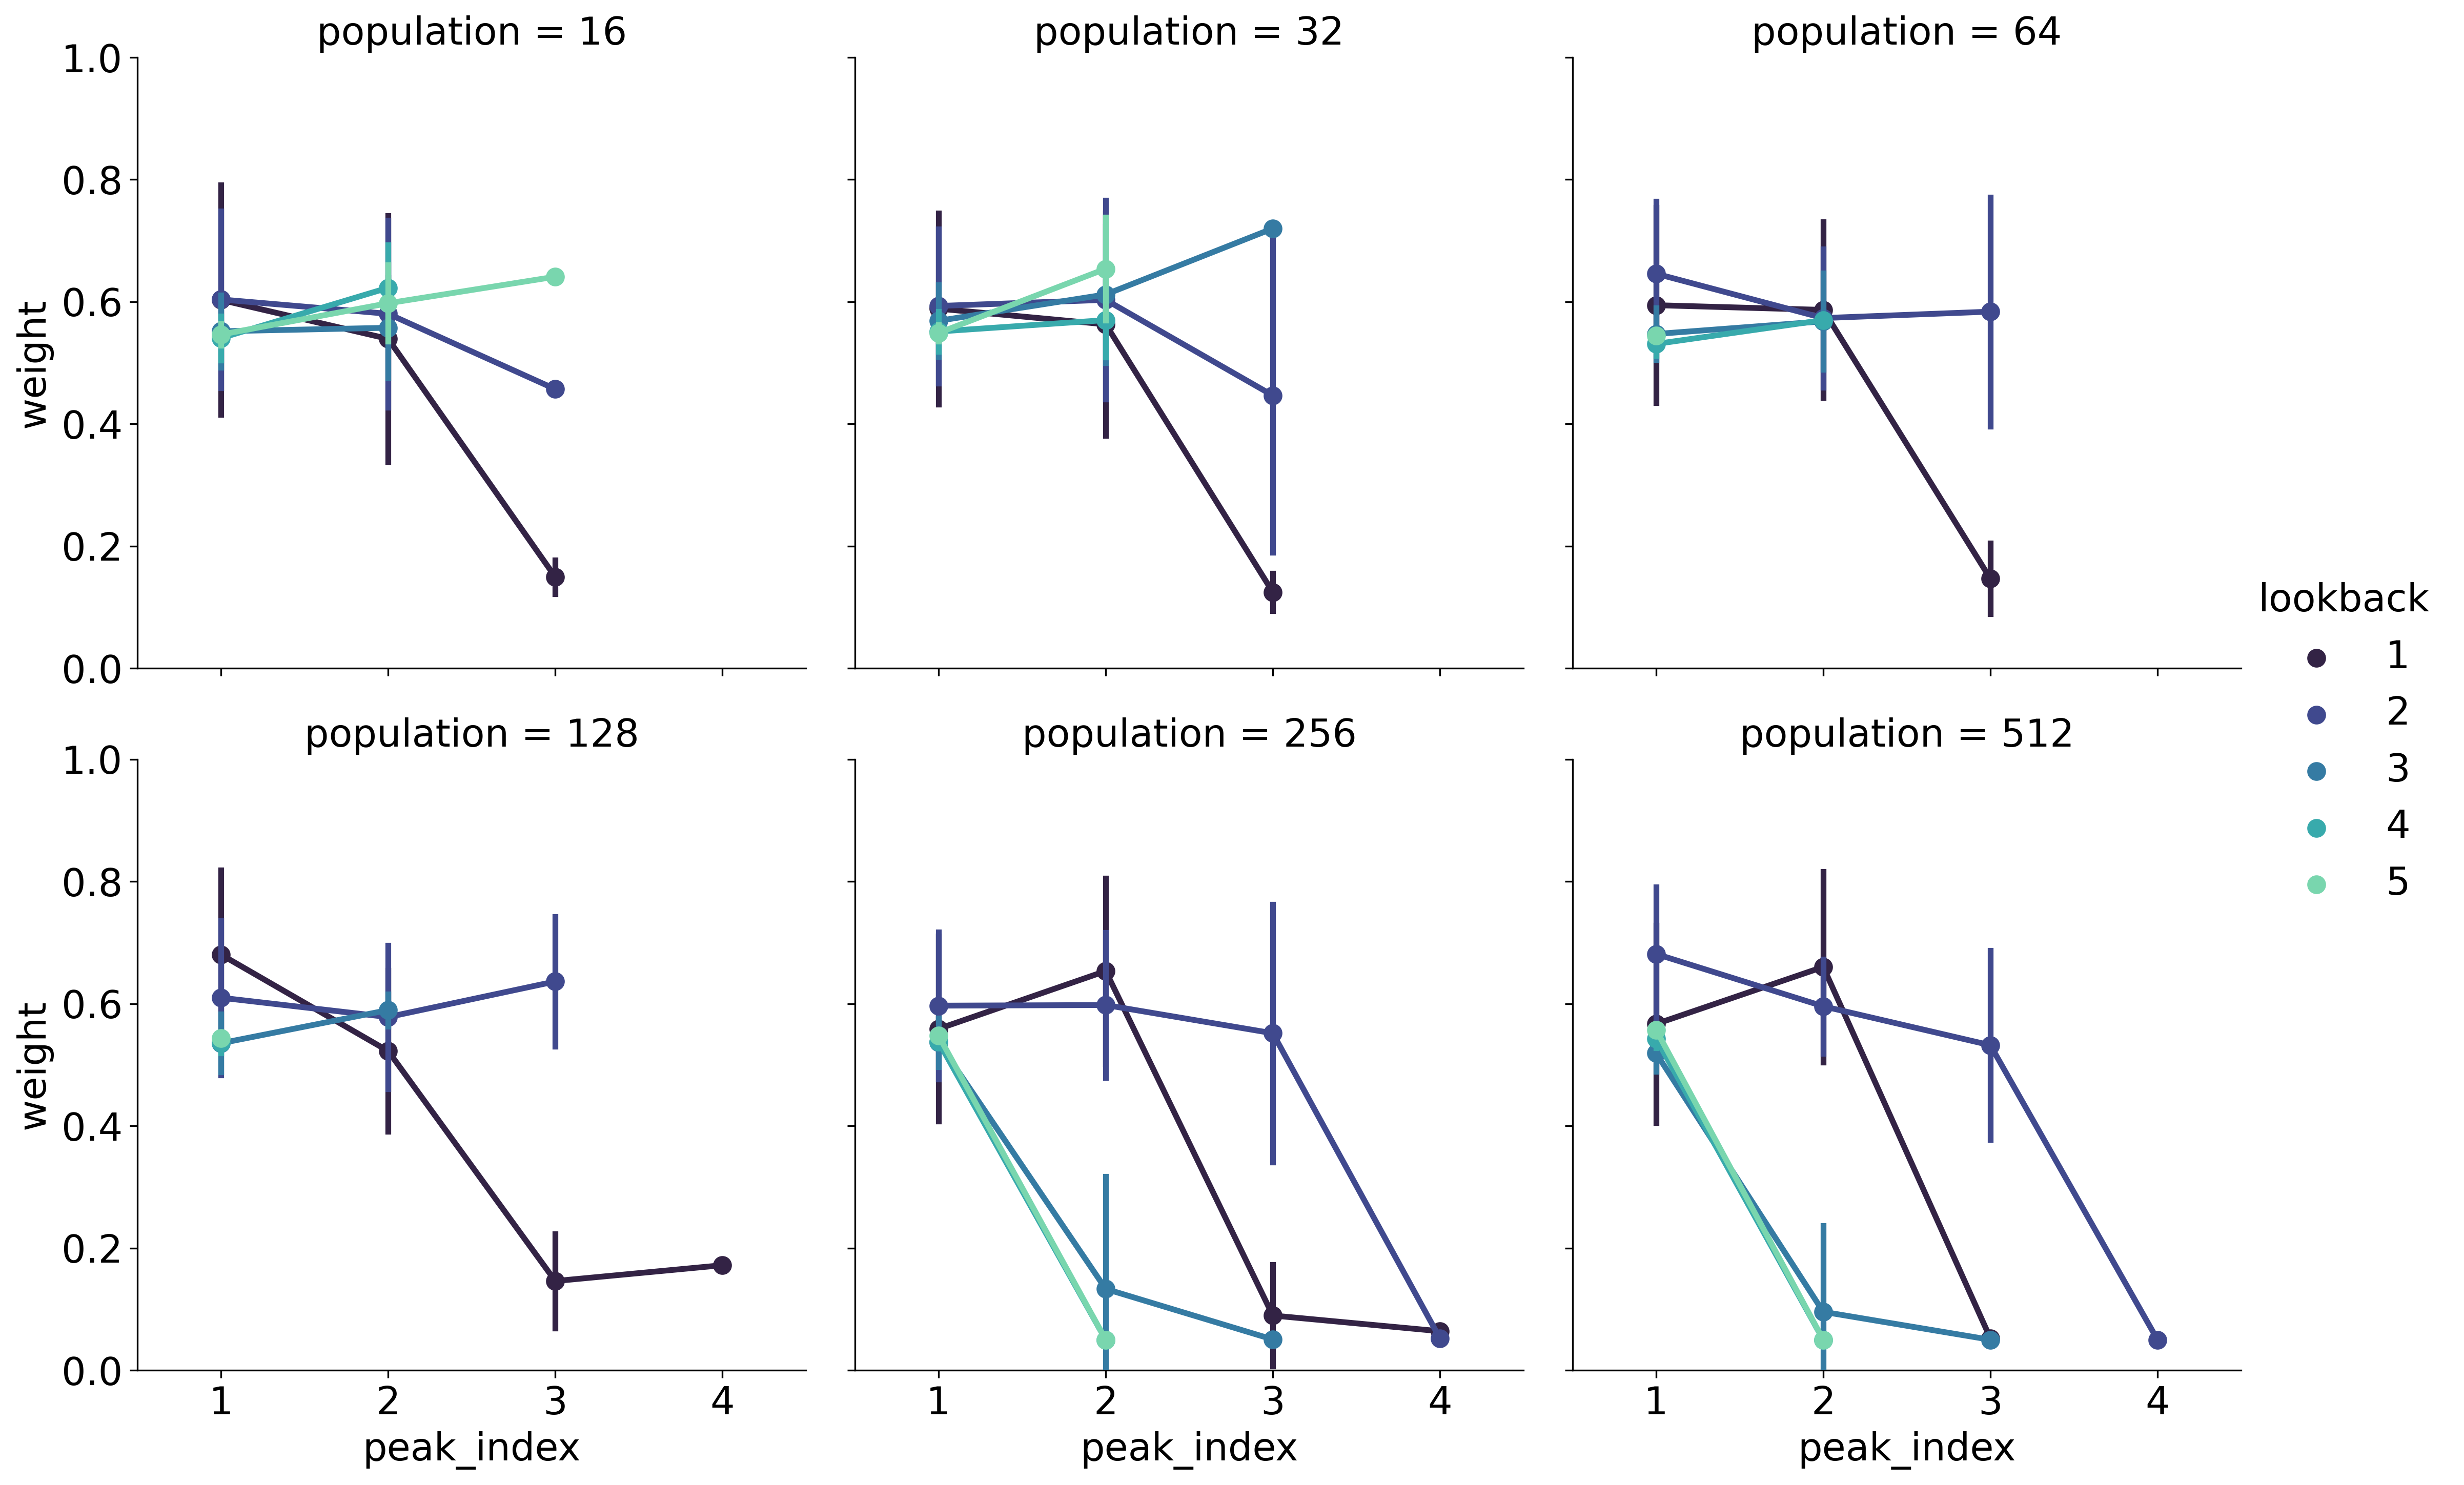

In [4]:
sns.catplot(
    data=peak_df[peak_df["phase"] == "train"],
    x="peak_index",
    y="weight",
    hue="lookback",
    col="population",
    palette="mako",
    col_wrap=3,
    kind="point",
    errorbar="sd",
)

plt.ylim(0.0, 1.0)

(0.0, 1.0)

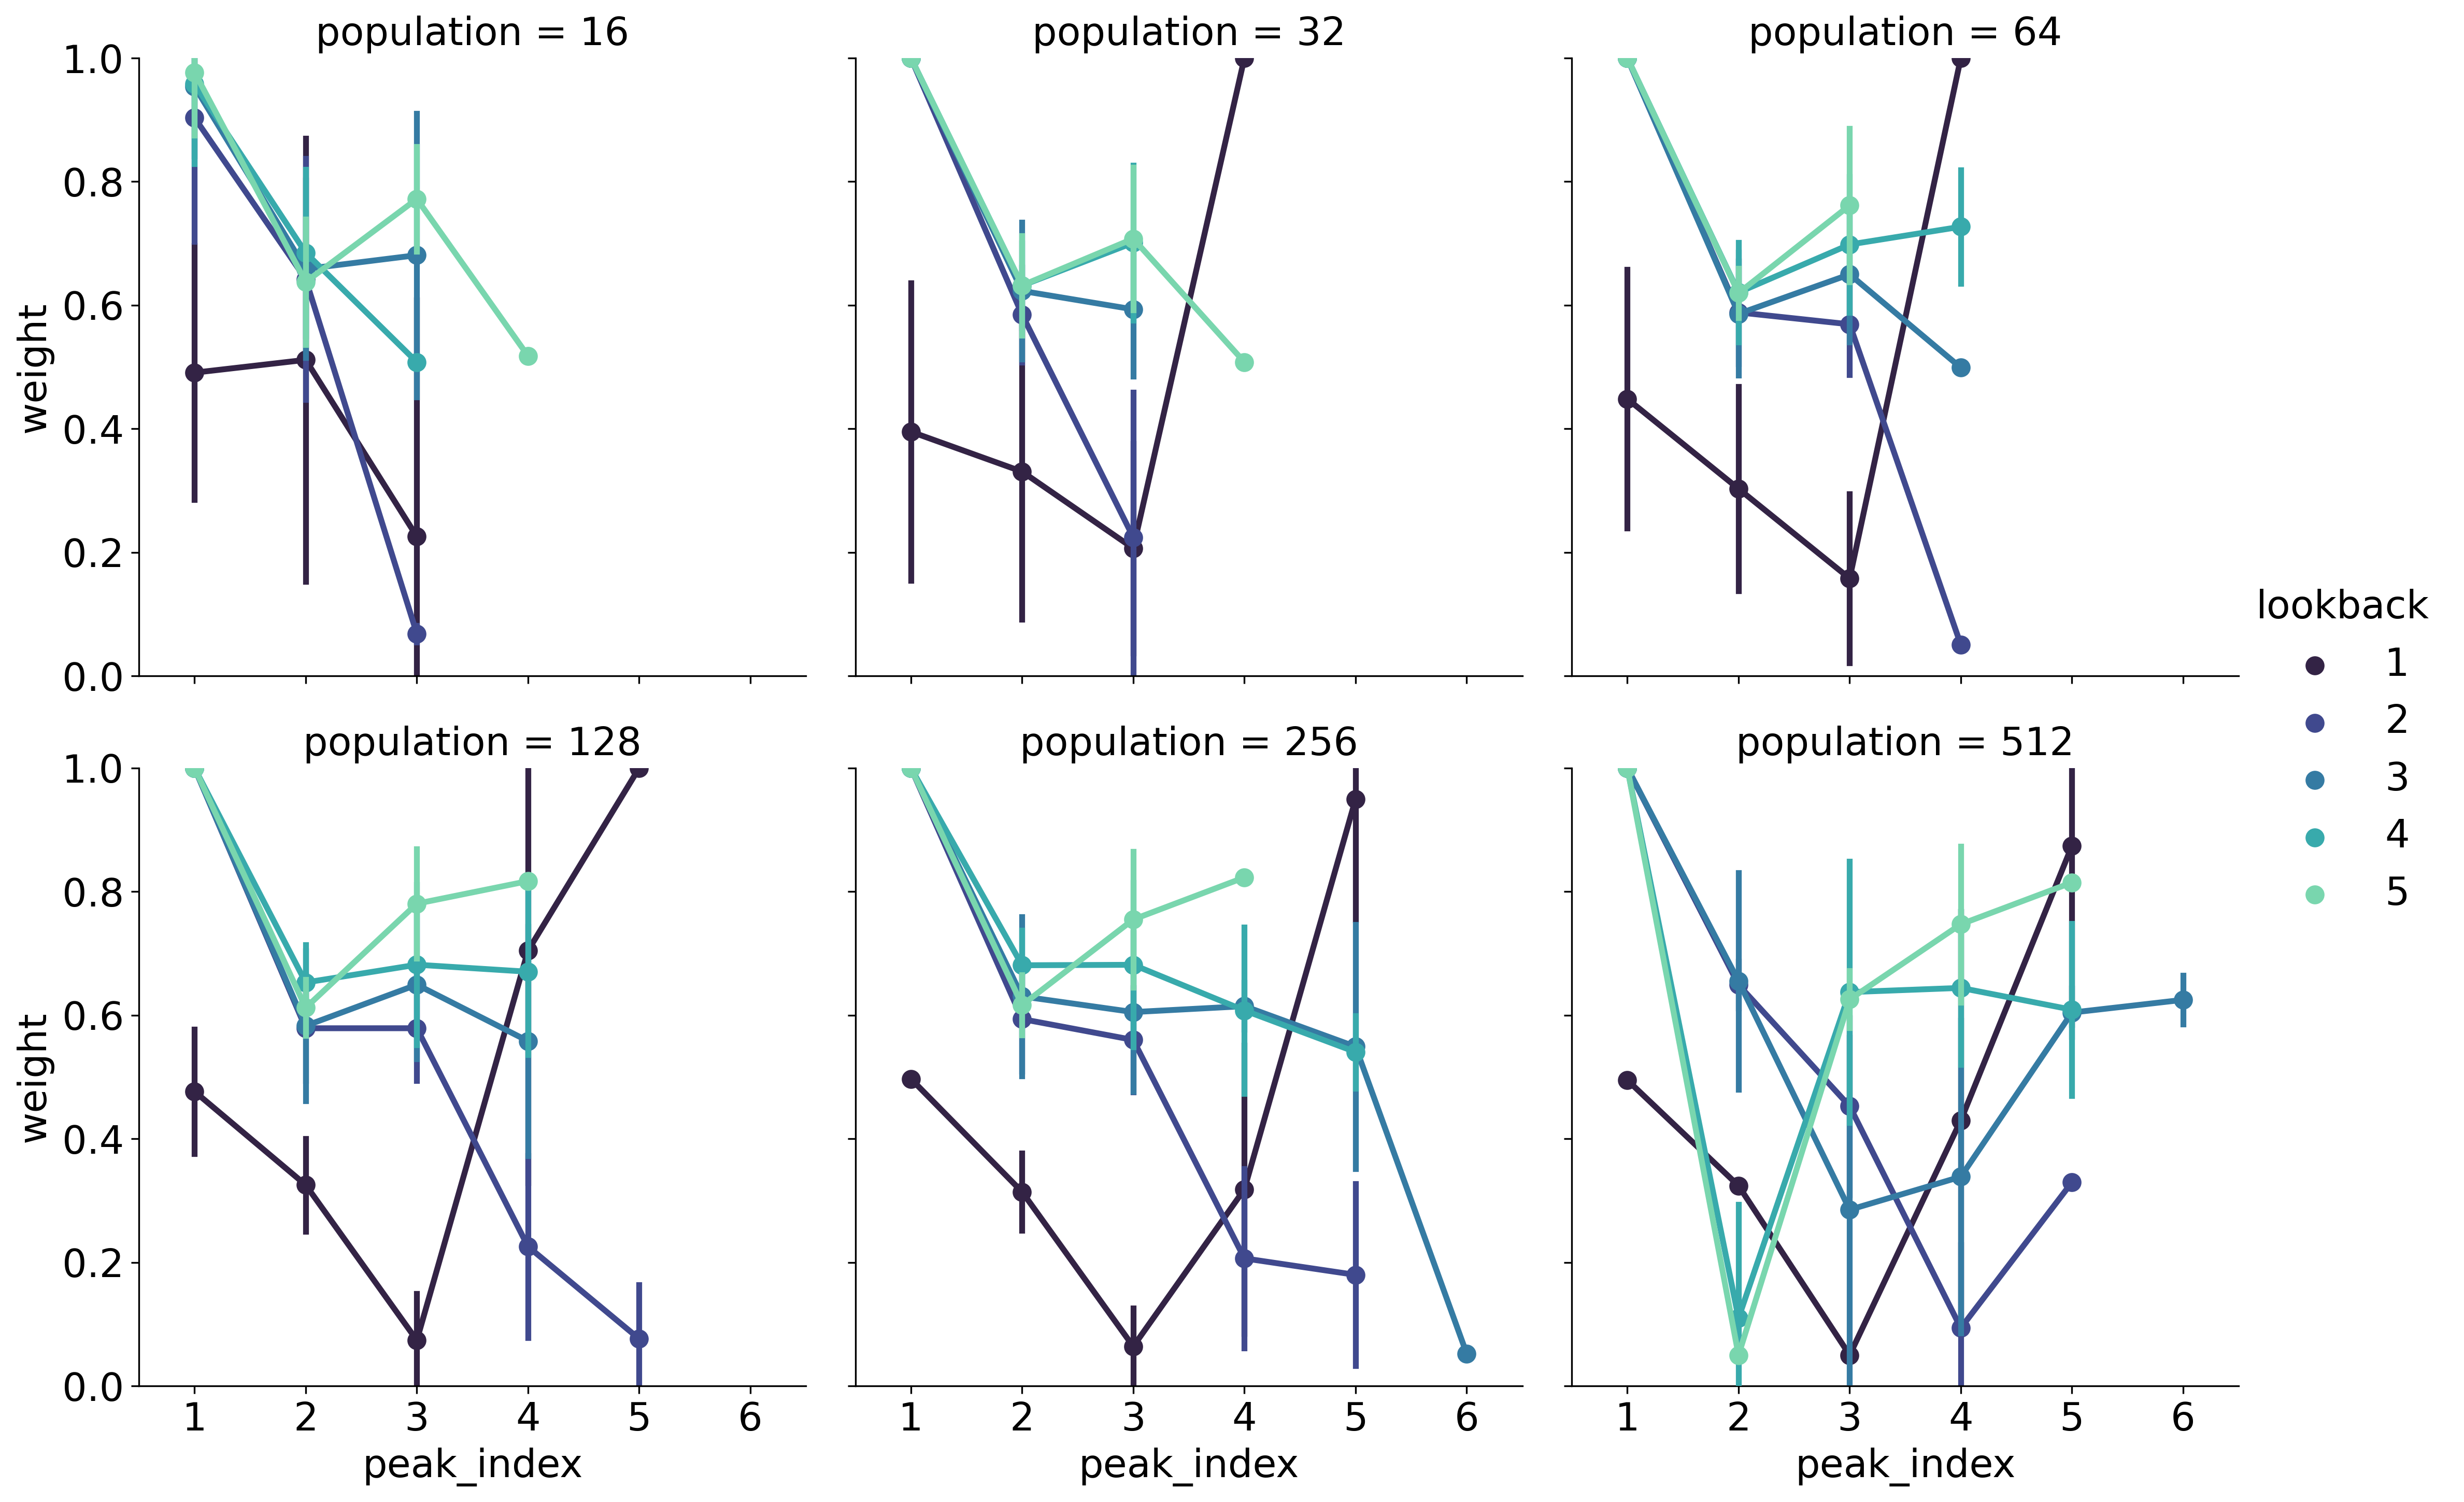

In [5]:
sns.catplot(
    data=peak_df[peak_df["phase"] == "test"],
    x="peak_index",
    y="weight",
    hue="lookback",
    col="population",
    palette="mako",
    col_wrap=3,
    kind="point",
    errorbar="sd",
)

plt.ylim(0.0, 1.0)

In [6]:
peak_df.groupby(["phase", "population", "lookback", "peak_index"]).agg(
    {"weight": ["mean", "std", "count"]}
)

weight                
                                          mean       std count
phase population lookback peak_index                          
test  16         1        1           0.490900  0.205582    20
                          2           0.511600  0.358558    20
                          3           0.225636  0.382889    11
                 2        1           0.903350  0.200292    20
                          2           0.642250  0.194668    20
...                                        ...       ...   ...
train 512        3        3           0.050000  0.000000     2
                 4        1           0.542850  0.015394    20
                          2           0.050000  0.000000    20
                 5        1           0.557000  0.003162    20
                          2           0.050000  0.000000    20

[202 rows x 3 columns]

In [7]:
agg_df = (
    peak_df[peak_df["peak_index"] == 1]
    .groupby(["phase", "population", "lookback"])
    .agg({"weight": ["mean", "std", "count"]})
)

agg_df

weight                
                              mean       std count
phase population lookback                         
test  16         1         0.49090  0.205582    20
                 2         0.90335  0.200292    20
                 3         0.95395  0.112692    20
                 4         0.95790  0.129254    20
                 5         0.97690  0.102131    20
      32         1         0.39530  0.240548    20
                 2         1.00000  0.000000    20
                 3         1.00000  0.000000    20
                 4         1.00000  0.000000    20
                 5         1.00000  0.000000    20
      64         1         0.44835  0.209308    20
                 2         1.00000  0.000000    20
                 3         1.00000  0.000000    20
                 4         1.00000  0.000000    20
                 5         1.00000  0.000000    20
      128        1         0.47655  0.100399    20
                 2         1.00000  0.000000    20
                 3         1.00000  0.000000    20
                 4         1.00000  0.000000    20
                 5         1.00000  0.000000    20
      256        1         0.49700  0.000000    20
                 2         1.00000  0.000000    20
                 3         1.00000  0.000000    20
                 4         1.00000  0.000000    20
                 5         1.00000  0.000000    20
      512        1         0.49495  0.000224    20
                 2         1.00000  0.000000    20
                 3         1.00000  0.000000    20
                 4         1.00000  0.000000    20
                 5         1.00000  0.000000    20
train 16         1         0.60300  0.187850    20
                 2         0.60375  0.144965    20
                 3         0.55175  0.059427    20
                 4         0.54065  0.036107    20
                 5         0.54640  0.017757    20
      32         1         0.58870  0.156300    20
                 2         0.59315  0.126193    20
                 3         0.56890  0.058313    20
                 4         0.55135  0.032913    20
                 5         0.54900  0.013557    20
      64         1         0.59440  0.160008    20
                 2         0.64590  0.118281    20
                 3         0.54730  0.042337    20
                 4         0.53105  0.018825    20
                 5         0.54460  0.010277    20
      128        1         0.68040  0.138557    20
                 2         0.60980  0.126151    20
                 3         0.53540  0.047275    20
                 4         0.53630  0.017232    20
                 5         0.54340  0.005374    20
      256        1         0.55890  0.151440    20
                 2         0.59685  0.120706    20
                 3         0.53660  0.039678    20
                 4         0.53750  0.010175    20
                 5         0.54765  0.004837    20
      512        1         0.56695  0.161475    20
                 2         0.68140  0.110057    20
                 3         0.51890  0.029521    20
                 4         0.54285  0.015394    20
                 5         0.55700  0.003162    20

In [8]:
agg_df2 = agg_df.reset_index()

agg_df3 = agg_df2.pivot(["phase", "population"], columns="lookback").reset_index()

agg_df3

C:\Users\jerem\AppData\Local\Temp/ipykernel_3208/2019636657.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  agg_df3 = agg_df2.pivot(["phase", "population"], columns="lookback").reset_index()


phase population   weight                                      \
                               mean                                       
lookback                          1        2        3        4        5   
0          test         16  0.49090  0.90335  0.95395  0.95790  0.97690   
1          test         32  0.39530  1.00000  1.00000  1.00000  1.00000   
2          test         64  0.44835  1.00000  1.00000  1.00000  1.00000   
3          test        128  0.47655  1.00000  1.00000  1.00000  1.00000   
4          test        256  0.49700  1.00000  1.00000  1.00000  1.00000   
5          test        512  0.49495  1.00000  1.00000  1.00000  1.00000   
6         train         16  0.60300  0.60375  0.55175  0.54065  0.54640   
7         train         32  0.58870  0.59315  0.56890  0.55135  0.54900   
8         train         64  0.59440  0.64590  0.54730  0.53105  0.54460   
9         train        128  0.68040  0.60980  0.53540  0.53630  0.54340   
10        train        256  0.55890  0.59685  0.53660  0.53750  0.54765   
11        train        512  0.56695  0.68140  0.51890  0.54285  0.55700   

                                                                              \
               std                                         count               
lookback         1         2         3         4         5     1   2   3   4   
0         0.205582  0.200292  0.112692  0.129254  0.102131    20  20  20  20   
1         0.240548  0.000000  0.000000  0.000000  0.000000    20  20  20  20   
2         0.209308  0.000000  0.000000  0.000000  0.000000    20  20  20  20   
3         0.100399  0.000000  0.000000  0.000000  0.000000    20  20  20  20   
4         0.000000  0.000000  0.000000  0.000000  0.000000    20  20  20  20   
5         0.000224  0.000000  0.000000  0.000000  0.000000    20  20  20  20   
6         0.187850  0.144965  0.059427  0.036107  0.017757    20  20  20  20   
7         0.156300  0.126193  0.058313  0.032913  0.013557    20  20  20  20   
8         0.160008  0.118281  0.042337  0.018825  0.010277    20  20  20  20   
9         0.138557  0.126151  0.047275  0.017232  0.005374    20  20  20  20   
10        0.151440  0.120706  0.039678  0.010175  0.004837    20  20  20  20   
11        0.161475  0.110057  0.029521  0.015394  0.003162    20  20  20  20   

              
              
lookback   5  
0         20  
1         20  
2         20  
3         20  
4         20  
5         20  
6         20  
7         20  
8         20  
9         20  
10        20  
11        20

In [9]:
for _, row in agg_df3[agg_df3["phase"] == "train"].iterrows():
    print(
        row["population"][0],
        *(
            f"${mean:.3f} \pm {std:.3f}$"
            for mean, std in zip(
                row["weight"]["mean"],
                row["weight"]["std"],
            )
        ),
        sep="\t&\t",
        end=" \\\\\n",
    )

16	&	$0.603 \pm 0.188$	&	$0.604 \pm 0.145$	&	$0.552 \pm 0.059$	&	$0.541 \pm 0.036$	&	$0.546 \pm 0.018$ \\
32	&	$0.589 \pm 0.156$	&	$0.593 \pm 0.126$	&	$0.569 \pm 0.058$	&	$0.551 \pm 0.033$	&	$0.549 \pm 0.014$ \\
64	&	$0.594 \pm 0.160$	&	$0.646 \pm 0.118$	&	$0.547 \pm 0.042$	&	$0.531 \pm 0.019$	&	$0.545 \pm 0.010$ \\
128	&	$0.680 \pm 0.139$	&	$0.610 \pm 0.126$	&	$0.535 \pm 0.047$	&	$0.536 \pm 0.017$	&	$0.543 \pm 0.005$ \\
256	&	$0.559 \pm 0.151$	&	$0.597 \pm 0.121$	&	$0.537 \pm 0.040$	&	$0.538 \pm 0.010$	&	$0.548 \pm 0.005$ \\
512	&	$0.567 \pm 0.161$	&	$0.681 \pm 0.110$	&	$0.519 \pm 0.030$	&	$0.543 \pm 0.015$	&	$0.557 \pm 0.003$ \\


In [10]:
for _, row in agg_df3[agg_df3["phase"] == "test"].iterrows():
    print(
        row["population"][0],
        *(
            f"${mean:.3f} \pm {std:.3f}$"
            for mean, std in zip(
                row["weight"]["mean"],
                row["weight"]["std"],
            )
        ),
        sep="\t&\t",
        end=" \\\\\n",
    )

16	&	$0.491 \pm 0.206$	&	$0.903 \pm 0.200$	&	$0.954 \pm 0.113$	&	$0.958 \pm 0.129$	&	$0.977 \pm 0.102$ \\
32	&	$0.395 \pm 0.241$	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$ \\
64	&	$0.448 \pm 0.209$	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$ \\
128	&	$0.477 \pm 0.100$	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$ \\
256	&	$0.497 \pm 0.000$	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$ \\
512	&	$0.495 \pm 0.000$	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$ \\


In [11]:
agg_df4 = (
    peak_df[peak_df["peak_index"] == 2]
    .groupby(["phase", "population", "lookback"])
    .agg({"weight": ["mean", "std", "count"]})
    .reset_index()
    .pivot(["phase", "population"], columns="lookback")
    .reset_index()
)

agg_df4

C:\Users\jerem\AppData\Local\Temp/ipykernel_3208/770687491.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  agg_df4 = peak_df[peak_df["peak_index"] == 2].groupby(["phase", "population", "lookback"]).agg({


phase population   weight                                         \
                               mean                                          
lookback                          1         2         3         4        5   
0          test         16  0.51160  0.642250  0.658700  0.684947  0.63765   
1          test         32  0.33075  0.584700  0.623150  0.631800  0.63205   
2          test         64  0.30305  0.588400  0.586050  0.620750  0.61965   
3          test        128  0.32535  0.578900  0.582850  0.653000  0.61210   
4          test        256  0.31415  0.593750  0.630450  0.680850  0.61640   
5          test        512  0.32410  0.649300  0.655300  0.109850  0.05000   
6         train         16  0.53930  0.580316  0.557429  0.622900  0.59760   
7         train         32  0.56310  0.603158  0.612000  0.570000  0.65400   
8         train         64  0.58670  0.573350  0.568000  0.570000      NaN   
9         train        128  0.52260  0.578200  0.589571       NaN      NaN   
10        train        256  0.65350  0.597850  0.133182  0.050000  0.05000   
11        train        512  0.66025  0.595800  0.095700  0.050000  0.05000   

                                                                              \
               std                                         count               
lookback         1         2         3         4         5     1     2     3   
0         0.358558  0.194668  0.143072  0.134630  0.101638  20.0  20.0  20.0   
1         0.239448  0.076641  0.110683  0.068805  0.080444  20.0  20.0  20.0   
2         0.165431  0.083080  0.099753  0.080739  0.040151  20.0  20.0  20.0   
3         0.074885  0.085159  0.121115  0.060578  0.045323  20.0  20.0  20.0   
4         0.062175  0.084504  0.128694  0.056544  0.048611  20.0  20.0  20.0   
5         0.000447  0.037968  0.175414  0.184215  0.000000  20.0  20.0  20.0   
6         0.201162  0.152774  0.081664  0.070264  0.062580  20.0  19.0   7.0   
7         0.182109  0.162660  0.111605  0.061000  0.084099  20.0  19.0   7.0   
8         0.143710  0.113358  0.078905       NaN       NaN  20.0  20.0   6.0   
9         0.132030  0.117270  0.026267       NaN       NaN  20.0  20.0   7.0   
10        0.151954  0.118826  0.183835  0.000000  0.000000  20.0  20.0  11.0   
11        0.156315  0.077049  0.140662  0.000000  0.000000  20.0  20.0  20.0   

                      
                      
lookback     4     5  
0         19.0  20.0  
1         20.0  20.0  
2         20.0  20.0  
3         20.0  20.0  
4         20.0  20.0  
5         20.0  20.0  
6         10.0   5.0  
7          3.0   4.0  
8          1.0   NaN  
9          NaN   NaN  
10        20.0  20.0  
11        20.0  20.0

In [12]:
for _, row in agg_df4[agg_df4["phase"] == "train"].iterrows():
    print(
        row["population"][0],
        *(
            f"${mean:.3f} \pm {std:.3f}\;({count})$"
            for mean, std, count in zip(
                row["weight"]["mean"],
                row["weight"]["std"],
                row["weight"]["count"],
            )
        ),
        sep="\t&\t",
        end=" \\\\\n",
    )

16	&	$0.539 \pm 0.201\;(20.0)$	&	$0.580 \pm 0.153\;(19.0)$	&	$0.557 \pm 0.082\;(7.0)$	&	$0.623 \pm 0.070\;(10.0)$	&	$0.598 \pm 0.063\;(5.0)$ \\
32	&	$0.563 \pm 0.182\;(20.0)$	&	$0.603 \pm 0.163\;(19.0)$	&	$0.612 \pm 0.112\;(7.0)$	&	$0.570 \pm 0.061\;(3.0)$	&	$0.654 \pm 0.084\;(4.0)$ \\
64	&	$0.587 \pm 0.144\;(20.0)$	&	$0.573 \pm 0.113\;(20.0)$	&	$0.568 \pm 0.079\;(6.0)$	&	$0.570 \pm nan\;(1.0)$	&	$nan \pm nan\;(nan)$ \\
128	&	$0.523 \pm 0.132\;(20.0)$	&	$0.578 \pm 0.117\;(20.0)$	&	$0.590 \pm 0.026\;(7.0)$	&	$nan \pm nan\;(nan)$	&	$nan \pm nan\;(nan)$ \\
256	&	$0.654 \pm 0.152\;(20.0)$	&	$0.598 \pm 0.119\;(20.0)$	&	$0.133 \pm 0.184\;(11.0)$	&	$0.050 \pm 0.000\;(20.0)$	&	$0.050 \pm 0.000\;(20.0)$ \\
512	&	$0.660 \pm 0.156\;(20.0)$	&	$0.596 \pm 0.077\;(20.0)$	&	$0.096 \pm 0.141\;(20.0)$	&	$0.050 \pm 0.000\;(20.0)$	&	$0.050 \pm 0.000\;(20.0)$ \\


In [13]:
for _, row in agg_df4[agg_df4["phase"] == "test"].iterrows():
    print(
        row["population"][0],
        *(
            f"${mean:.3f} \pm {std:.3f}\;({count})$"
            for mean, std, count in zip(
                row["weight"]["mean"],
                row["weight"]["std"],
                row["weight"]["count"],
            )
        ),
        sep="\t&\t",
        end=" \\\\\n",
    )

16	&	$0.512 \pm 0.359\;(20.0)$	&	$0.642 \pm 0.195\;(20.0)$	&	$0.659 \pm 0.143\;(20.0)$	&	$0.685 \pm 0.135\;(19.0)$	&	$0.638 \pm 0.102\;(20.0)$ \\
32	&	$0.331 \pm 0.239\;(20.0)$	&	$0.585 \pm 0.077\;(20.0)$	&	$0.623 \pm 0.111\;(20.0)$	&	$0.632 \pm 0.069\;(20.0)$	&	$0.632 \pm 0.080\;(20.0)$ \\
64	&	$0.303 \pm 0.165\;(20.0)$	&	$0.588 \pm 0.083\;(20.0)$	&	$0.586 \pm 0.100\;(20.0)$	&	$0.621 \pm 0.081\;(20.0)$	&	$0.620 \pm 0.040\;(20.0)$ \\
128	&	$0.325 \pm 0.075\;(20.0)$	&	$0.579 \pm 0.085\;(20.0)$	&	$0.583 \pm 0.121\;(20.0)$	&	$0.653 \pm 0.061\;(20.0)$	&	$0.612 \pm 0.045\;(20.0)$ \\
256	&	$0.314 \pm 0.062\;(20.0)$	&	$0.594 \pm 0.085\;(20.0)$	&	$0.630 \pm 0.129\;(20.0)$	&	$0.681 \pm 0.057\;(20.0)$	&	$0.616 \pm 0.049\;(20.0)$ \\
512	&	$0.324 \pm 0.000\;(20.0)$	&	$0.649 \pm 0.038\;(20.0)$	&	$0.655 \pm 0.175\;(20.0)$	&	$0.110 \pm 0.184\;(20.0)$	&	$0.050 \pm 0.000\;(20.0)$ \\
